HUFIM Algorithm

In [ ]:
!pip install -U pami

In [ ]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/utilityDatabases/Utility_T10I4D100K.csv #sample utility database

File ‘Utility_T10I4D100K.csv’ already there; not retrieving.



In [ ]:
!head -2 Utility_T10I4D100K.csv

25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834:852:25	96	32	50	20	80	48	58	75	86	64	57	16	14	46	85 
39	120	124	205	401	581	704	814	825	834:396:6	60	42	58	31	53	10	52	22	62 


In [ ]:
import PAMI.extras.dbStats.UtilityDatabase as stats

inputFile = 'Utility_T10I4D100K.csv'

obj=stats.UtilityDatabase(inputFile,sep='\t')

obj.run()

print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')


Database size : 99935
Total number of items : 870
Database sparsity : 0.9883886940304302
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.667097909135199
Variance in Transaction Sizes : 13.447741640067324


In [ ]:
minimumSupportCount = 2000
minUtilCount = 30000

In [ ]:
from PAMI.highUtilityFrequentPattern.basic import HUFIM  as hufim

obj = hufim.HUFIM(iFile=inputFile, minUtil=minUtilCount, minSup=minimumSupportCount, sep='\t')
obj.mine()

obj.save('utilityFrequentPatternsAtMinSupCount2000.txt')


frequentPatternsDF= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF)))
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

High Utility Frequent patterns were generated successfully using HUFIM algorithm
Total No of patterns: 155
Runtime: 32.24299430847168
Memory (RSS): 244908032
Memory (USS): 195506176


In [ ]:
!head 'utilityFrequentPatternsAtMinSupCount2000.txt'

368:389886:7821 
529:354693:7053 
829:344326:6802 
766:312711:6259 
722:293956:5839 
354:293525:5830 
684:270761:5404 
217:268340:5369 
494:258303:5097 
419:248584:5051 


In [ ]:
import pandas as pd
result = pd.DataFrame(columns=['algorithm', 'minimumSupportCount', 'minUtilCount', 'patterns', 'runtime', 'memory'])
result.loc[result.shape[0]] = ['HUFIM', minimumSupportCount, minUtilCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

In [ ]:
for minSupCount in minimumSupportCountList:
    obj = hufim.HUFIM(inputFile, minUtil=minUtilCount, minSup=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['HUFIM', minSupCount, minUtilCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

NameError: name 'minimumSupportCountList' is not defined

In [ ]:
print(result)

  algorithm  minimumSupportCount  minUtilCount  patterns    runtime     memory
0     HUFIM                 2000         30000       155  32.242994  244908032


In [ ]:
result10000 = pd.DataFrame(columns=['algorithm', 'minimumSupportCount', 'minUtilCount', 'patterns', 'runtime', 'memory'])
minUtilCount = 10000
seperator='\t'
index = 0  # incrementing index
for minSupCount in minimumSupportCountList:
    obj = hufim.HUFIM(inputFile, minUtil=minUtilCount, minSup=minSupCount, sep=seperator)
    obj.mine()
    # store the results in the data frame
    result10000.loc[index] = ['HUFIM', minSupCount, minUtilCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
    index += 1  # increment the index

High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm


In [ ]:
result20000 = pd.DataFrame(columns=['algorithm', 'minimumSupportCount', 'minUtilCount', 'patterns', 'runtime', 'memory'])
minUtilCount = 20000
seperator='\t'
index = 0  # incrementing index
for minSupCount in minimumSupportCountList:
    obj = hufim.HUFIM(inputFile, minUtil=minUtilCount, minSup=minSupCount, sep=seperator)
    obj.mine()
    # store the results in the data frame
    result20000.loc[index] = ['HUFIM', minSupCount, minUtilCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
    index += 1  # increment the index

High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm


In [ ]:
#Using multiple multiple mininum utility and minimum support count
result30000 = pd.DataFrame(columns=['algorithm', 'minimumSupportCount', 'minUtilCount', 'patterns', 'runtime', 'memory'])
minUtilCount = 30000
seperator='\t'
index = 0  # incrementing index
for minSupCount in minimumSupportCountList:
    obj = hufim.HUFIM(inputFile, minUtil=minUtilCount, minSup=minSupCount, sep=seperator)
    obj.mine()
    # store the results in the data frame
    result30000.loc[index] = ['HUFIM', minSupCount, minUtilCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
    index += 1  # increment the index

High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm


In [ ]:
result10000.to_csv('result10000.csv')
result20000.to_csv('result20000.csv')
result30000.to_csv('result30000.csv')

In [ ]:
print(result10000)
print(result20000)
print(result30000)

  algorithm  minimumSupportCount  minUtilCount  patterns    runtime     memory
0     HUFIM                 1000         10000       385  96.050236  249778176
1     HUFIM                 2000         10000       155  47.792307  255995904
2     HUFIM                 3000         10000        60  20.660288  255995904
3     HUFIM                 4000         10000        26  12.848194  255995904
4     HUFIM                 5000         10000        10   9.521697  257138688
  algorithm  minimumSupportCount  minUtilCount  patterns    runtime     memory
0     HUFIM                 1000         20000       385  86.904360  259301376
1     HUFIM                 2000         20000       155  42.749265  259301376
2     HUFIM                 3000         20000        60  19.652045  259301376
3     HUFIM                 4000         20000        26  12.475034  257204224
4     HUFIM                 5000         20000        10   9.154965  256155648
  algorithm  minimumSupportCount  minUtilCount  patt

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



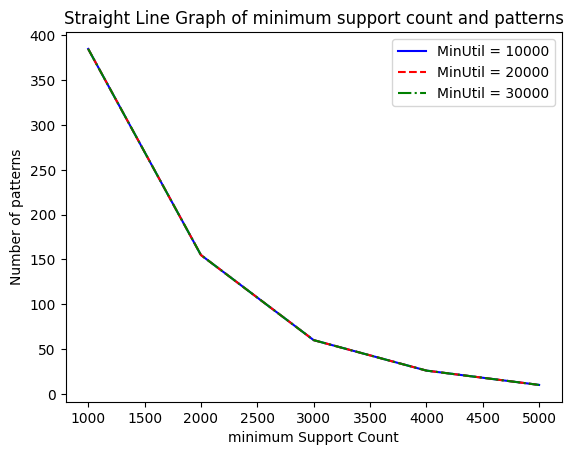

In [ ]:
plt.plot(result10000['minimumSupportCount'], result10000['patterns'], label='MinUtil = 10000', linestyle='-', color='blue')
plt.plot(result20000['minimumSupportCount'], result20000['patterns'], label='MinUtil = 20000', linestyle='--', color='red')
plt.plot(result30000['minimumSupportCount'], result30000['patterns'], label='MinUtil = fd30000', linestyle='-.', color='green')
plt.xlabel('minimum Support Count')
plt.ylabel('Number of patterns')
plt.title('Straight Line Graph of minimum support count and patterns')
plt.legend()
plt.show()

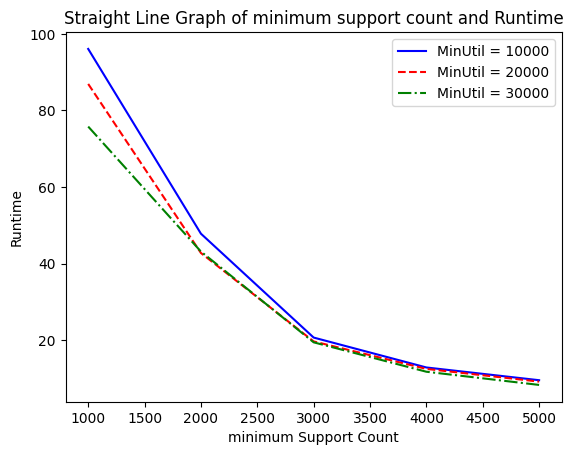

In [ ]:
plt.plot(result10000['minimumSupportCount'], result10000['runtime'], label='MinUtil = 10000', linestyle='-', color='blue')
plt.plot(result20000['minimumSupportCount'], result20000['runtime'], label='MinUtil = 20000', linestyle='--', color='red')
plt.plot(result30000['minimumSupportCount'], result30000['runtime'], label='MinUtil = 30000', linestyle='-.', color='green')
plt.xlabel('minimum Support Count')
plt.ylabel('Runtime')
plt.title('Straight Line Graph of minimum support count and Runtime')
plt.legend()
plt.show()